In [26]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

the length of the eeg_data is: 38271
which in time duration is:  74.748046875  seconds


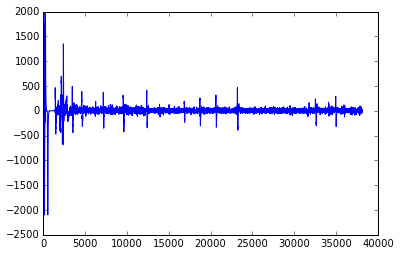

In [27]:
# load the eeg data that Vic or Iran prepared using matlab for you
eeg_data = np.genfromtxt('shane_eeg', delimiter=',')

fs = 512.0

print 'the length of the eeg_data is:', len(eeg_data)

duration = len(eeg_data)/fs

print 'which in time duration is: ', duration, ' seconds'

# generate a time vector
time = np.linspace(0,duration,len(eeg_data))

# # let's see our raw data!!!!!!!!!!!!
# plt.plot(eeg_data[160:fs])
# plt.show()

onset_data = np.asarray(eeg_data[160:])

plt.plot(onset_data)
plt.show()

The number of dummy_index is:  22
The shape of the clean_epoch_matrix is:  (52, 512)


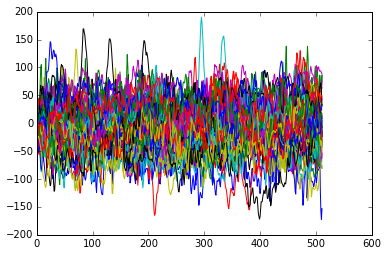

In [39]:
# epoching 

fs = 512

epoch_matrix = np.zeros([len(onset_data)/fs,fs])

for epoch in range(len(onset_data)/fs):

    epoch_matrix[epoch,:] = onset_data[epoch*fs:(epoch+1)*fs].T    

# baseline
for epoch in range(len(onset_data)/fs):
    
    offset = epoch_matrix[epoch,0]
    
    epoch_matrix[epoch,:] = epoch_matrix[epoch,:] - offset
    

# trial elimination based on a threshold
threshold = 200

clean_epoch_matrix = np.zeros([len(onset_data)/fs,fs])

dummy_index = 0

for epoch in range(len(onset_data)/fs):

    if np.max(np.abs(epoch_matrix[epoch,:])) < threshold:
        
        clean_epoch_matrix[epoch-dummy_index,:] = epoch_matrix[epoch,:]
        
    if np.max(np.abs(epoch_matrix[epoch,:])) > threshold:
        
        dummy_index = dummy_index + 1

clean_epoch_matrix = clean_epoch_matrix[0:-dummy_index]

print 'The number of dummy_index is: ', dummy_index

print 'The shape of the clean_epoch_matrix is: ', clean_epoch_matrix.shape

plt.plot(clean_epoch_matrix.T)
plt.show()

The size of ERP is:  (512,)
[ 0.         -0.51922    -3.53843923 -5.82687615 -3.44227962 -0.76918385
 -0.88457577 -1.98074769 -1.86535    -0.65380077 -1.30765846 -3.42301692
 -4.82684808 -4.01907269 -3.59599923 -4.01917962 -4.51919038 -4.88458154
 -4.69208731 -4.92296923 -4.69217038 -5.65371962 -6.40372269 -5.57681038
 -4.13447462 -2.30755654 -0.82679885 -1.49987577 -1.90373923 -1.90371538]


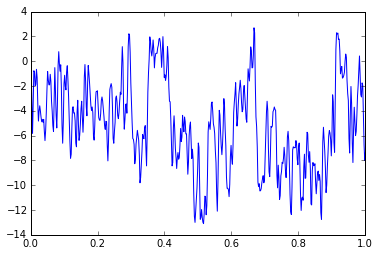

In [48]:
# Let's get serious and do the average!

ERP = np.mean(clean_epoch_matrix, axis=0)

print 'The size of ERP is: ', ERP.shape

time = np.linspace(0,1,len(ERP))

print ERP[0:30]

plt.plot(time,ERP)
plt.show()